## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


In [1]:
# Add only your imports here
import pandas as pd
import csv
import networkx as n
import matplotlib.pyplot as plt
from collections import deque
import plotly.express as px
import matplotlib.image as mpimg
import glob
import matplotlib.transforms as transforms



In [2]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
#basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#Define file paths
cities_path ="/Users/martgom/Documents/UTSA/FALL-2023/Artificial Intelligence/HW1/cities.csv"
distances_path = "/Users/martgom/Documents/UTSA/FALL-2023/Artificial Intelligence/HW1/distances.csv"


#print for testing the access 
#print(cities_data.head())


In [3]:
# Load the graph data from the files
#load for the csv files using panda        
#cities_data = pd.read_csv(cities_path)
#distances_data = pd.read_csv(distances_path)
#print(distances_data.head())
#using reader with import cvs
#initialize the graph
graph = n.Graph()
#array of data
coordinates= {}
city_distances= {}
#Cities fill the array with the cities and coordinates


with open(cities_path, 'r') as c_file:
    CSVreader = csv.reader(c_file)
    for row in CSVreader:
        cityN, latitude, longitude = row
        coordinates[cityN] = (float(latitude), float(longitude))
#Distances fill the array with the distances 
with open(distances_path,'r') as d_file:
    CSVreader = csv.reader(d_file)
    for row in CSVreader:
        c1, c2, distance = row
        city_distances[(c1,c2)] = float(distance)
        
    #nodes for cities
    for city in coordinates:
       graph.add_node(city, position=coordinates[city])
    
    #edges
    for (c1, c2), distance in city_distances.items():
        graph.add_edge(c1,c2, weight = distance)
        
            
        
    

   

        

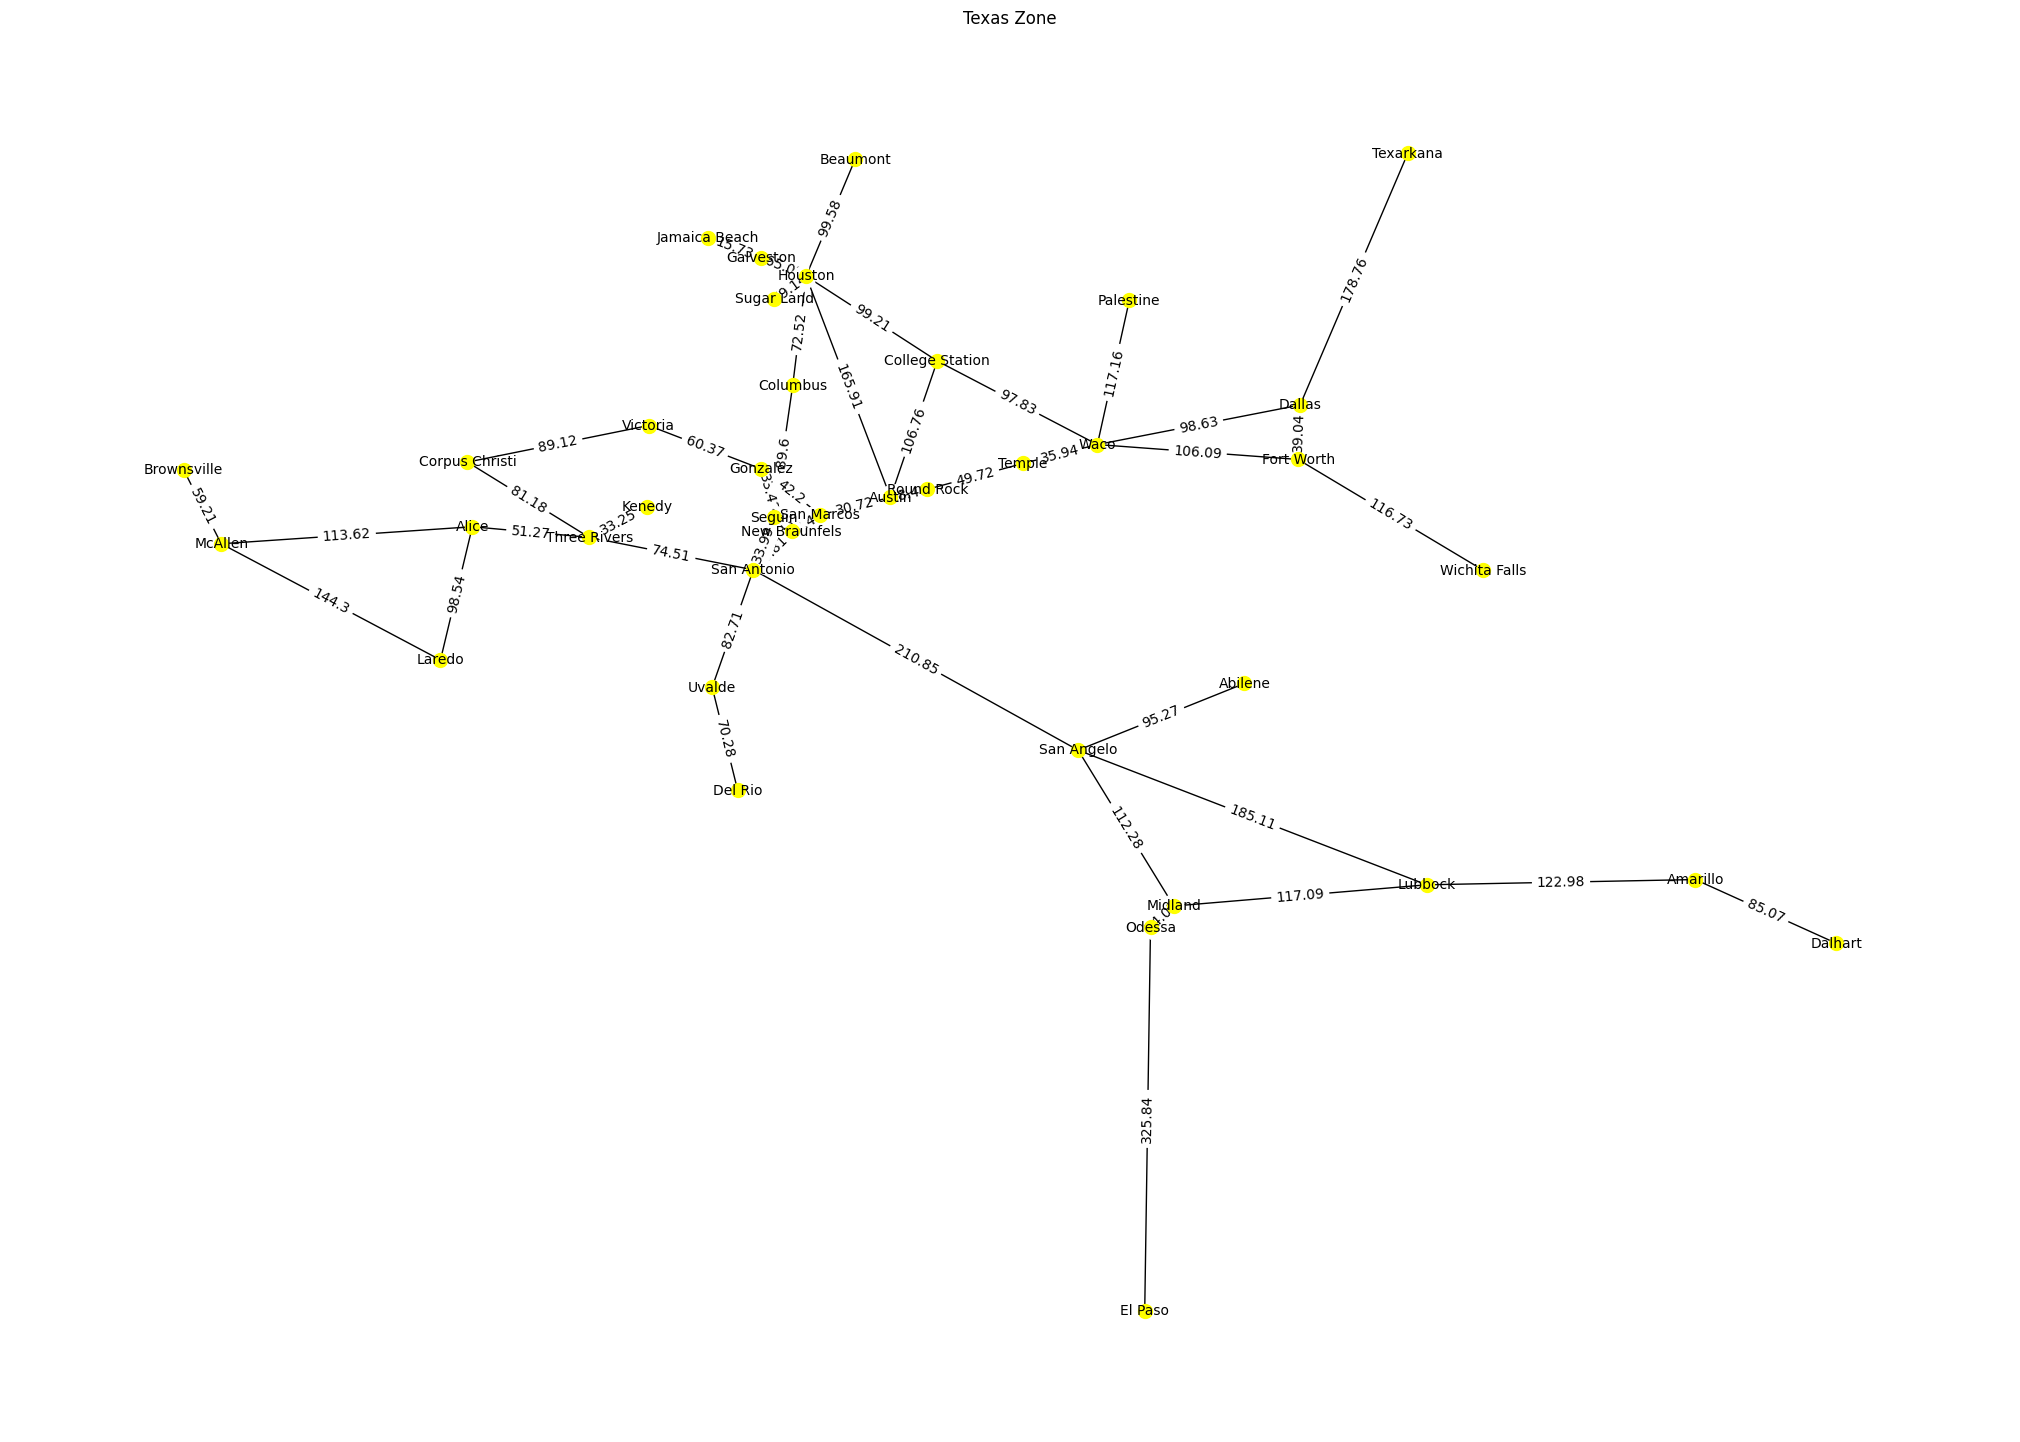

In [4]:
#Display a 2D graph of the given data/
# Create a figure
plt.figure(figsize=(20, 14))

# Get node positions and edge labels
node_positions = n.get_node_attributes(graph, 'position')
edge_labels = {(c1, c2): round(dist, 2) for (c1, c2), dist in city_distances.items()}

# Draw nodes
n.draw(
    graph,
    node_positions,
    node_size=100,
    node_color='yellow',
    font_color='black',
    font_weight='normal',
    with_labels=True,
    font_size=10
)

# Draw edge labels
n.draw_networkx_edge_labels(
    graph, 
    node_positions, 
    edge_labels=edge_labels
)

# Show graph
plt.axis('off')
#set title
plt.title('Texas Zone')
#show the figure
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [5]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'

#method to spread the virus
def virus_spread(graph,start):
    #record of spreaded areas
    spreaded = set()
    #list to affect cities,(father, child)
    queue = deque ([(start, None)])
    #steps
    road = []
    #distance spreaded
    spreaded_distance = 0.0
    
    while queue:
        #step to eliminate one by one in order
        c_city, p = queue.popleft()
        #if statement to check if the city it is not infected
        if c_city not in spreaded: spreaded.add(c_city), road.append(c_city)
        
        #update distance
        if p is not None: spreaded_distance += graph[p][c_city]['weight']
        
        #add next city to the queue
        neighbors = list(graph.neighbors(c_city))
        for newCity in neighbors: 
            if newCity not in spreaded:  queue.append((newCity, c_city))
            
    
    return road, spreaded_distance



#First city spreading virus        
start = "Three Rivers"
#virus spreaded
path, spreaded_distance = virus_spread(graph, start)


#Print for the distance and the path
print("The spread path is: \n" + "->".join(path) + "\nThe distance that the coronavirus has spreaded in miles:")
print(spreaded_distance)

        
        
    




The spread path is: 
Three Rivers->San Antonio->Corpus Christi->Alice->Kenedy->San Angelo->New Braunfels->Seguin->Uvalde->Victoria->Laredo->McAllen->Midland->Lubbock->Abilene->San Marcos->Gonzalez->Columbus->Del Rio->Brownsville->Odessa->Amarillo->Austin->Houston->El Paso->Dalhart->Round Rock->College Station->Beaumont->Galveston->Sugar Land->Temple->Waco->Jamaica Beach->Palestine->Fort Worth->Dallas->Wichita Falls->Texarkana
The distance that the coronavirus has spreaded in miles:
6526.71638007


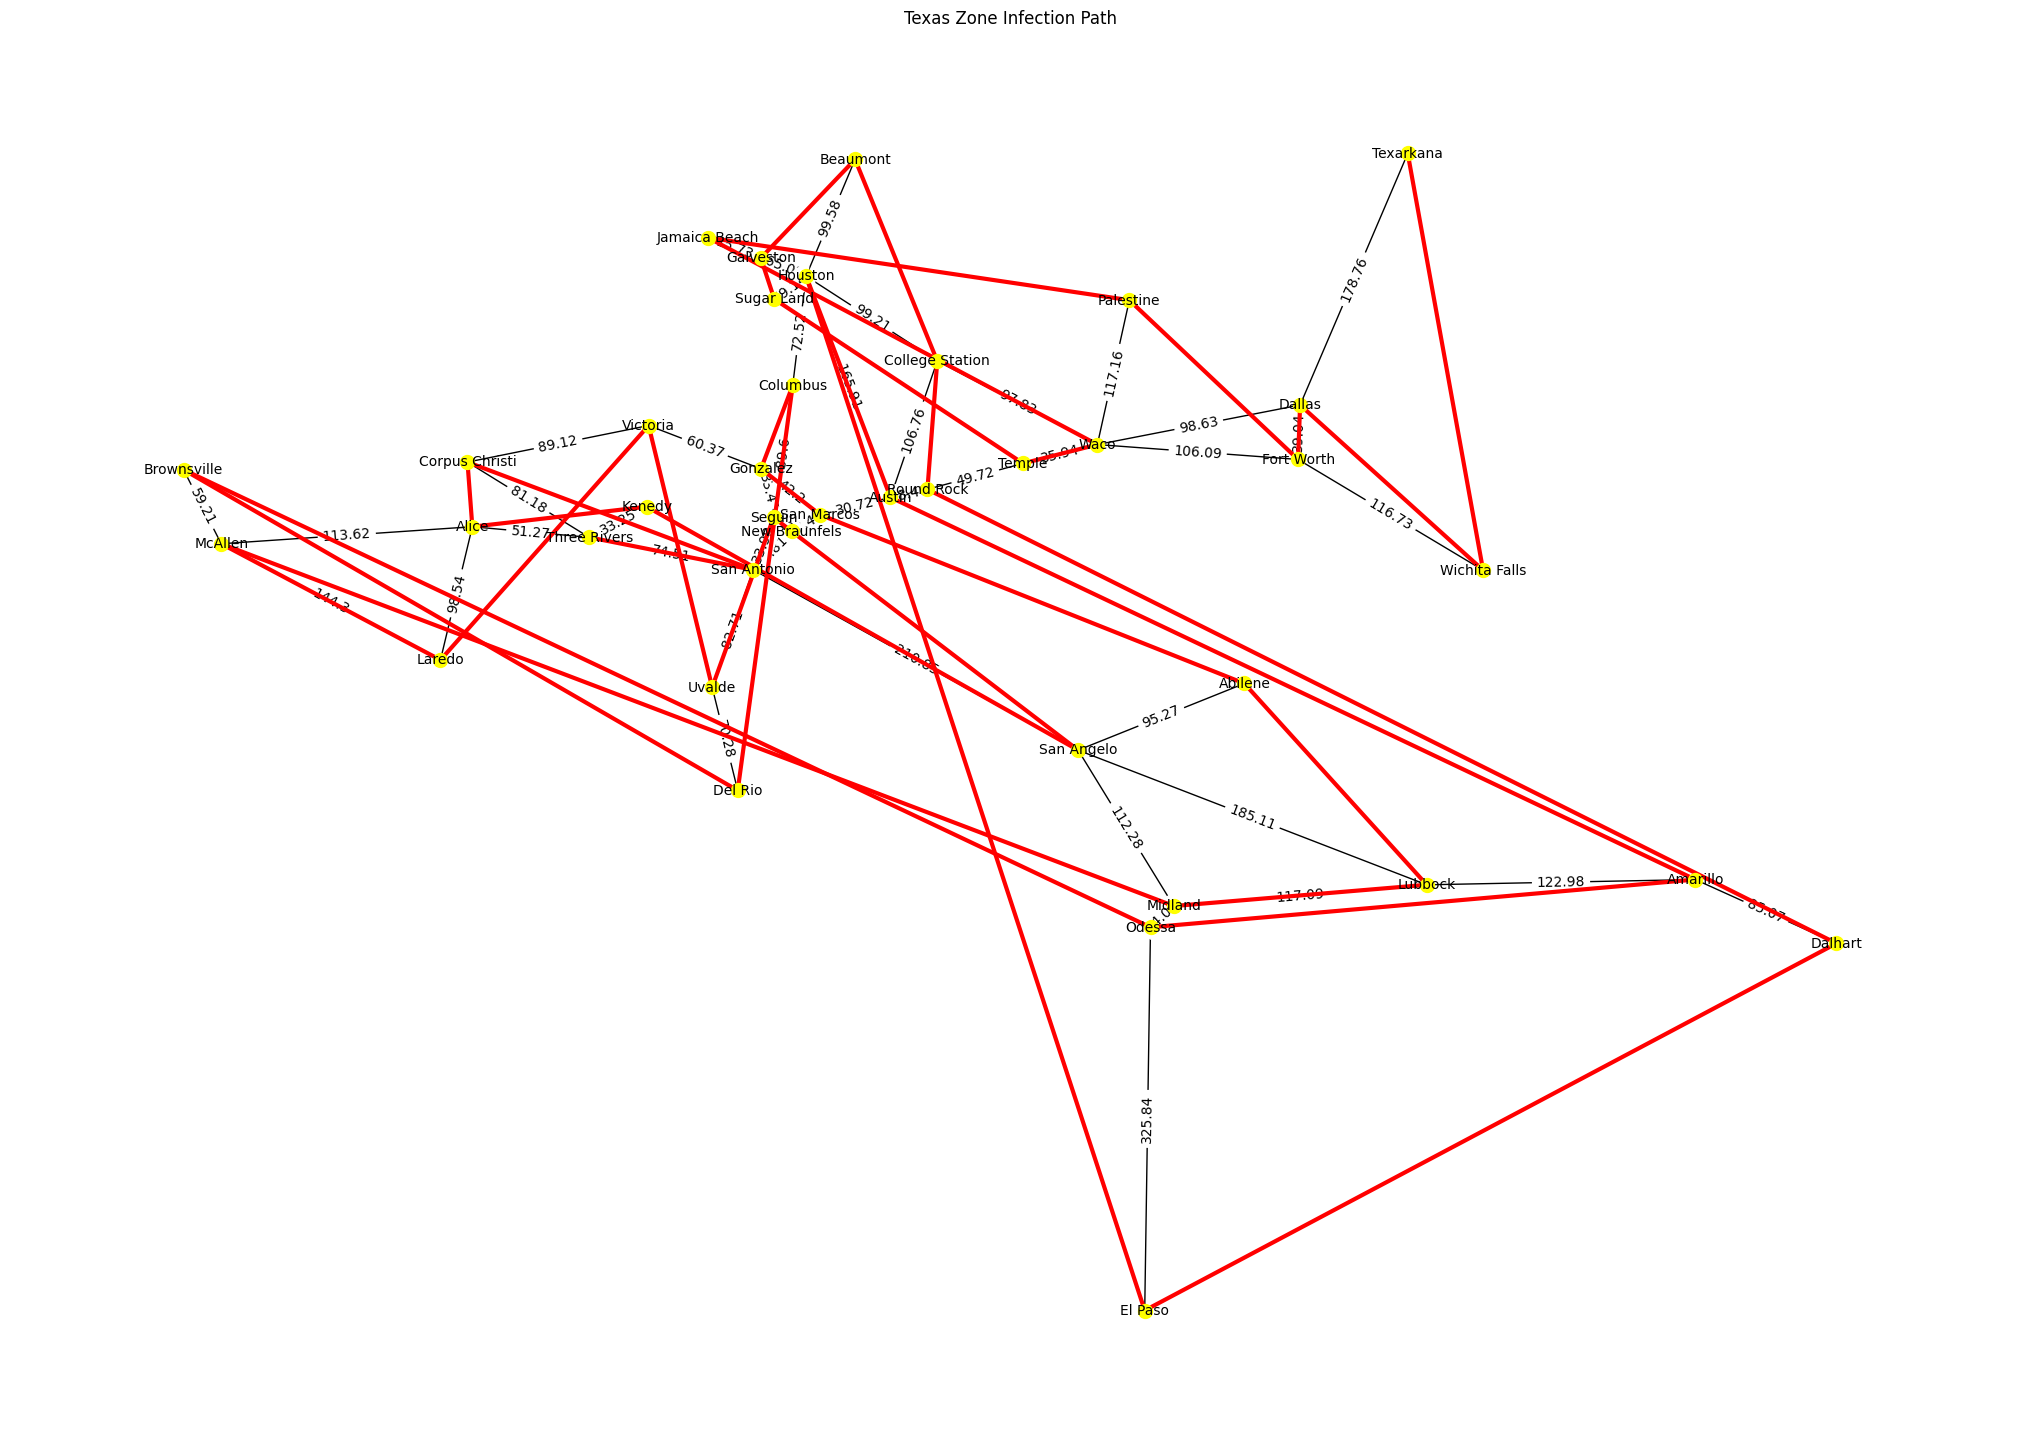

In [6]:
#Overlay the maps 

# Create a figure
plt.figure(figsize=(20, 14))

# Get node positions and edge labels
node_positions = n.get_node_attributes(graph, 'position')
edge_labels = {(c1, c2): round(dist, 2) for (c1, c2), dist in city_distances.items()}

# Draw nodes
n.draw(
    graph,
    node_positions,
    node_size=100,
    node_color='yellow',
    font_color='black',
    font_weight='normal',
    with_labels=True,
    font_size=10
)



# Draw edge labels
n.draw_networkx_edge_labels(
    graph, 
    node_positions, 
    edge_labels=edge_labels
)

#Draw path 
selected_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
n.draw_networkx_edges(graph,node_positions, edgelist=selected_path, edge_color='red',width=3.0)


# Show graph
plt.axis('off')
#set title
plt.title('Texas Zone Infection Path')
#show the figure
plt.show()


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

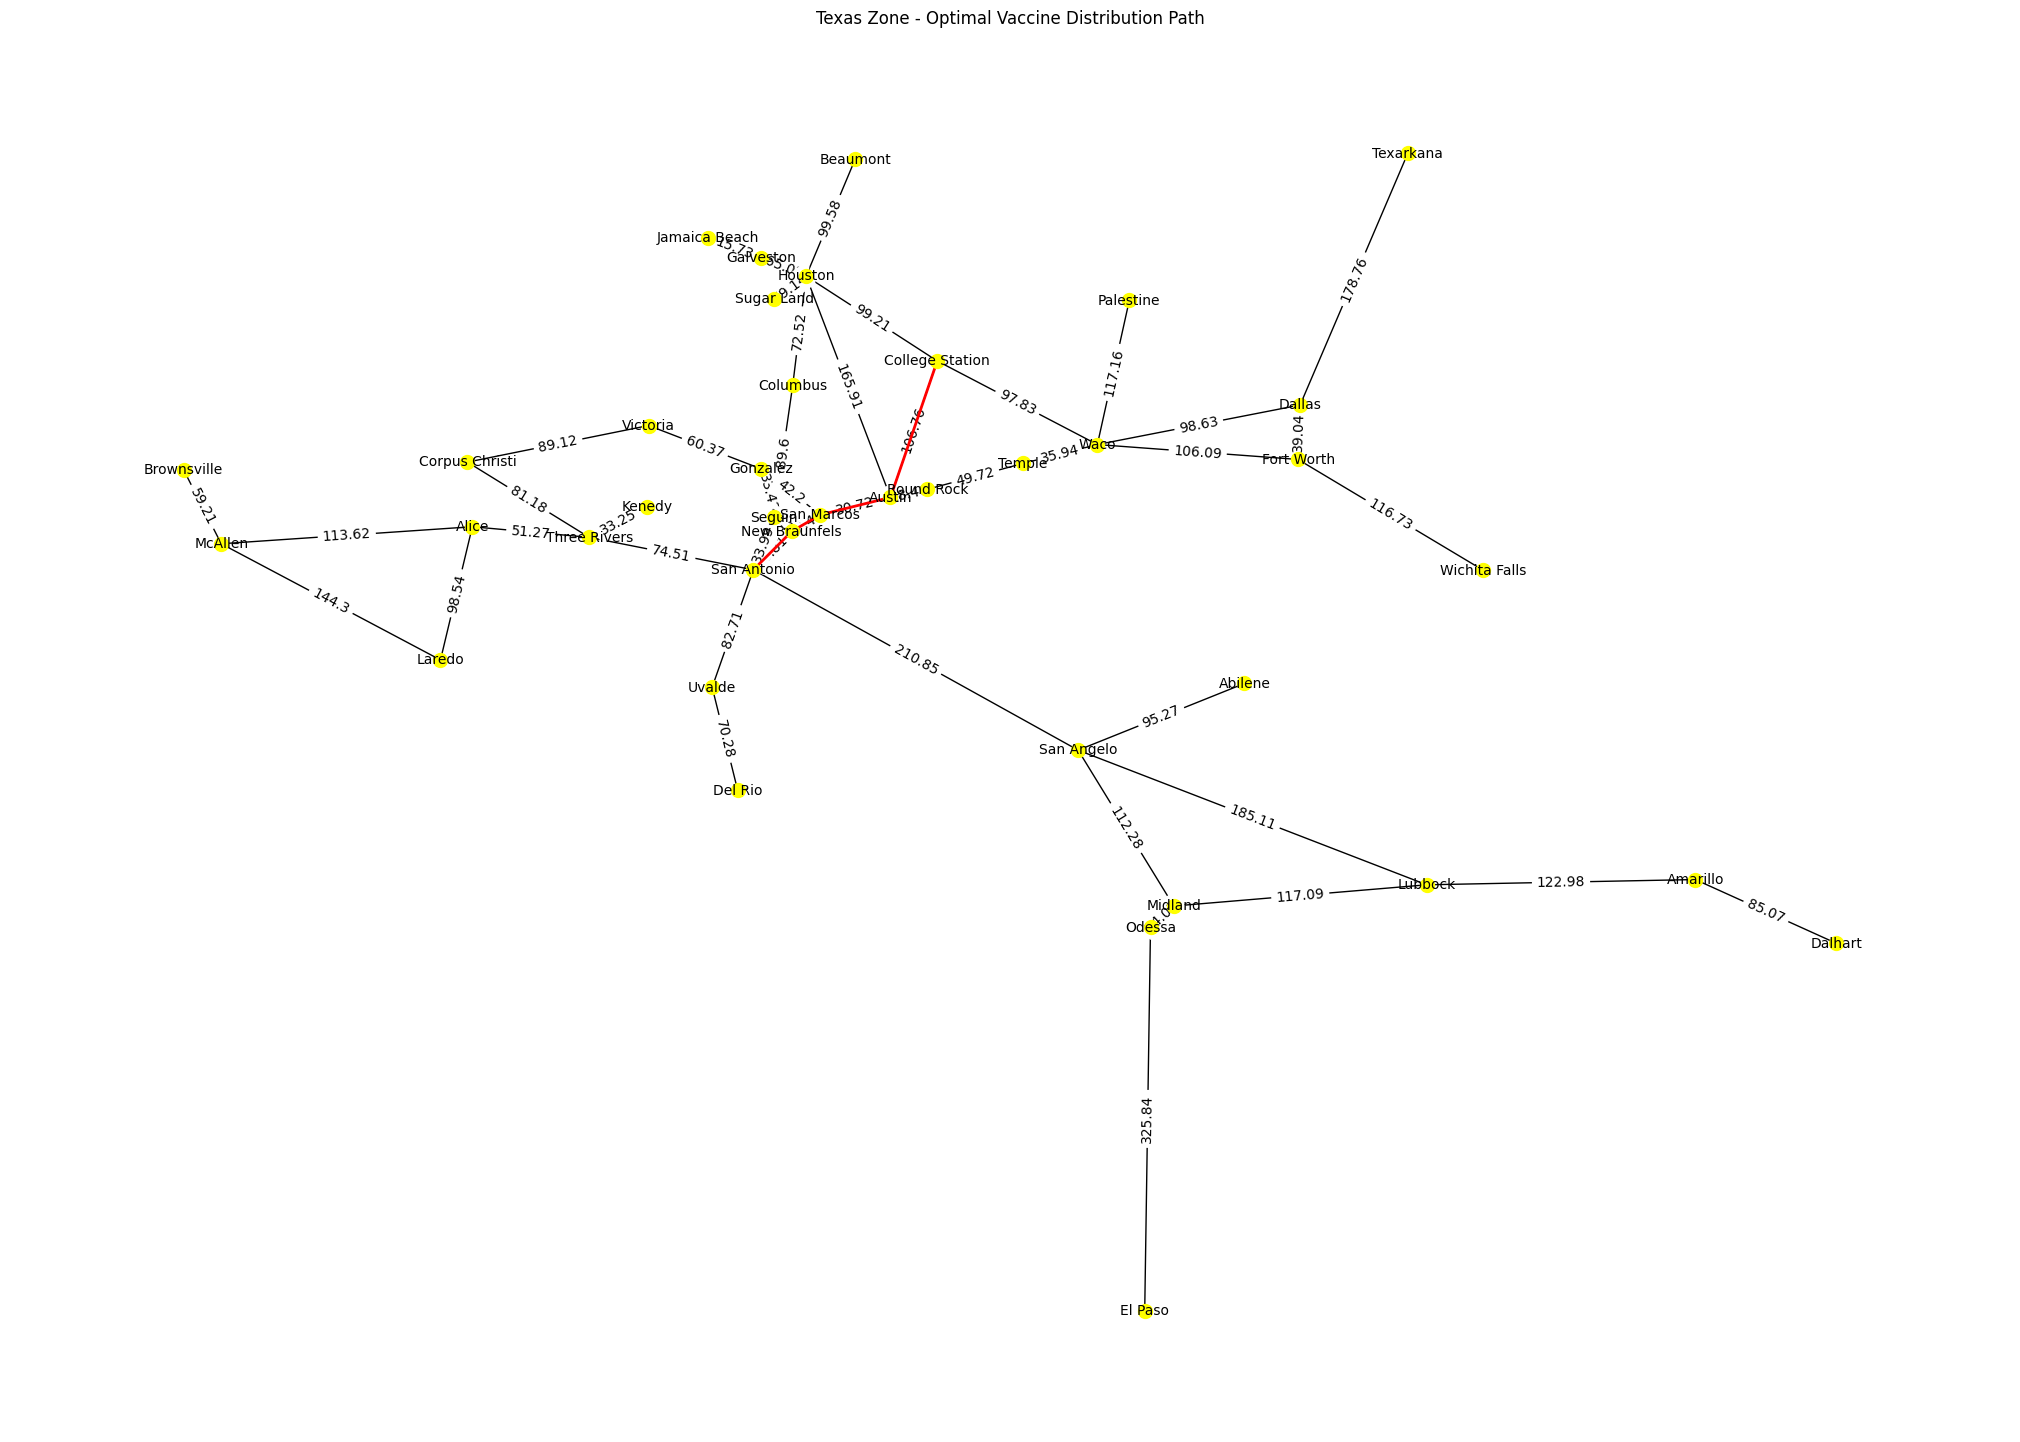

Optimal Path from San Antonio to College Station:
San Antonio
New Braunfels
San Marcos
Austin
College Station
Total Distance: 186.77450141 miles


In [7]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
# Find the optimal path using A* algorithm
def astar_path(graph, start, goal):
    def heuristic(node, goal):
        return n.shortest_path_length(graph, node, goal, weight='weight')

    path = n.astar_path(graph, start, goal, heuristic=heuristic, weight='weight')
    return path

# Specify the start and goal cities
start_city = 'San Antonio'
goal_city = 'College Station'

#plt.imshow(texas_map, extent=[-106, -93, 25, 37])
#set texas map
texas_map = mpimg.imread("/Users/martgom/Documents/UTSA/FALL-2023/Artificial Intelligence/HW1/tx-01.webp")
# Find the optimal path from 'San Antonio' to 'College Station'
optimal_path = astar_path(graph, start_city, goal_city)
total_distance = sum(graph[optimal_path[i]][optimal_path[i + 1]]['weight'] for i in range(len(optimal_path) - 1))
# Create a figure for visualization
plt.figure(figsize=(20, 14))
#set texas map
#plt.imshow(texas_map, extent=[38, 23, -93, -108])
# Get node positions and edge labels
node_positions = n.get_node_attributes(graph, 'position')
edge_labels = {(c1, c2): round(dist, 2) for (c1, c2), dist in city_distances.items()}

# Draw nodes
n.draw(
    graph,
    node_positions,
    node_size=100,
    node_color='yellow',
    font_color='black',
    font_weight='normal',
    with_labels=True,
    font_size=10
)

# Draw edge labels
n.draw_networkx_edge_labels(
    graph,
    node_positions,
    edge_labels=edge_labels
)

# Highlight the optimal path
optimal_path_edges = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
n.draw_networkx_edges(graph, node_positions, edgelist=optimal_path_edges, edge_color='red', width=2)

# Show graph
plt.axis('off')
# Set title
plt.title('Texas Zone - Optimal Vaccine Distribution Path')
# Show the figure
plt.show()

# Print the optimal path
print(f"Optimal Path from {start_city} to {goal_city}:")
for city in optimal_path:
    print(city)
print(f"Total Distance: {total_distance} miles")
